In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True) #overide matplot libs ugly colours.

In [2]:
%matplotlib inline 

In [3]:
plt.rcParams['figure.figsize'] = (13, 13) # default figure size unless specified in each plot

In [4]:
day_use_df = pd.read_csv('DayUse_Webscrape_DataFile.csv',index_col=0)
day_use_df.head()

,Date,Day_of_week,Hotel_name,Link,Stars,Location,Current_price_HKD,Original_prices_HKD,Discount_percentage,Rating,...,Spa,Elevator,Cleanliness,Check-in,Room Quality,Reception,Access,Value_for_money,Amenities,Tranquility
0,2021-11-06,Saturday,the kimberley hotel,https://en.dayuse.com.hk/hotels/hong-kong/the-...,4,Tsim Sha Tsui,450,900,50,4.3,...,0,1,4.3,4.3,4.3,4.4,4.3,4.4,4.2,4.2
1,2021-11-07,Sunday,the kimberley hotel,https://en.dayuse.com.hk/hotels/hong-kong/the-...,4,Tsim Sha Tsui,350,900,62,4.3,...,0,1,4.3,4.3,4.3,4.4,4.3,4.4,4.2,4.2
2,2021-11-08,Monday,the kimberley hotel,https://en.dayuse.com.hk/hotels/hong-kong/the-...,4,Tsim Sha Tsui,350,900,62,4.3,...,0,1,4.3,4.3,4.3,4.4,4.3,4.4,4.2,4.2
3,2021-11-09,Tuesday,the kimberley hotel,https://en.dayuse.com.hk/hotels/hong-kong/the-...,4,Tsim Sha Tsui,350,900,62,4.3,...,0,1,4.3,4.3,4.3,4.4,4.3,4.4,4.2,4.2
4,2021-11-10,Wednesday,the kimberley hotel,https://en.dayuse.com.hk/hotels/hong-kong/the-...,4,Tsim Sha Tsui,350,900,62,4.3,...,0,1,4.3,4.3,4.3,4.4,4.3,4.4,4.2,4.2


In [5]:
day_use_df.describe()

,Stars,Current_price_HKD,Original_prices_HKD,Discount_percentage,Rating,Total_reviews,Wheelchair accessible rooms,Business center,Bar,Parking close by,...,Spa,Elevator,Cleanliness,Check-in,Room Quality,Reception,Access,Value_for_money,Amenities,Tranquility
count,3043.000000,3043.000000,3043.000000,3043.000000,2447.000000,2447.000000,3043.000000,3043.000000,3043.000000,3043.000000,...,3043.000000,3043.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000
mean,3.858692,439.885311,863.404535,44.256326,4.216592,19.541479,0.703582,0.457115,0.348012,0.196845,...,0.058824,0.954979,4.290631,4.317004,4.114321,4.282666,4.303178,4.133265,4.065993,4.158935
std,0.650504,160.747777,473.574580,16.422272,0.359230,20.092423,0.456753,0.498239,0.476418,0.397680,...,0.235333,0.207385,0.430945,0.357010,0.512983,0.409574,0.406636,0.427598,0.424720,0.383702
min,3.000000,280.000000,400.000000,0.000000,3.300000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,3.000000,2.500000,2.500000,3.000000,2.500000,2.800000,3.100000
25%,3.000000,330.000000,600.000000,34.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,4.200000,4.200000,4.000000,4.100000,4.200000,4.000000,3.900000,4.000000
50%,4.000000,385.000000,750.000000,44.000000,4.300000,11.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,4.300000,4.300000,4.200000,4.300000,4.400000,4.200000,4.100000,4.200000
75%,4.000000,500.000000,935.000000,57.000000,4.400000,29.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,4.600000,4.500000,4.500000,4.500000,4.550000,4.400000,4.300000,4.400000
max,5.000000,1400.000000,3500.000000,79.000000,5.000000,104.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
#convert date column to datetime format
day_use_df['Date'] = pd.to_datetime(day_use_df.Date)

In [7]:
#convert the long string for 51 Man Tung Road, Tung Chung, Hong Kong
day_use_df['Location'] = day_use_df['Location'].str.replace("51 Man Tung Road, Tung Chung, Hong Kong","Tung Chung")

In [8]:
# convert stars dataframe to string to signify category
day_use_df['Stars'] = day_use_df['Stars'].apply(str)

In [9]:
#narrow down search for a particular date  say next Saturday
df_tomorrow = day_use_df[day_use_df['Date']== '2021-11-13']

In [10]:
#no of deals available on 13th Nov, Saturday
df_tomorrow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 7 to 2948
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          90 non-null     datetime64[ns]
 1   Day_of_week                   90 non-null     object        
 2   Hotel_name                    90 non-null     object        
 3   Link                          90 non-null     object        
 4   Stars                         90 non-null     object        
 5   Location                      90 non-null     object        
 6   Current_price_HKD             90 non-null     int64         
 7   Original_prices_HKD           90 non-null     int64         
 8   Discount_percentage           90 non-null     int64         
 9   Rating                        75 non-null     float64       
 10  Total_reviews                 75 non-null     float64       
 11  Wheelchair accessible rooms   90

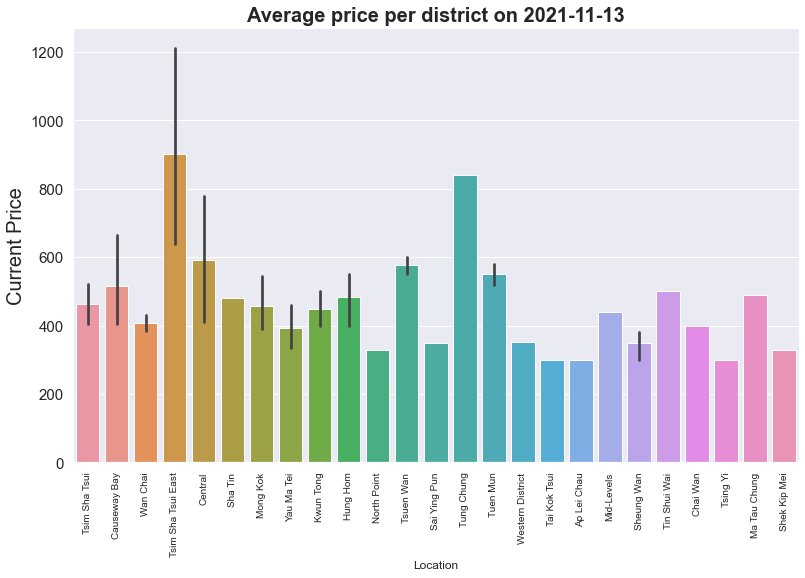

In [11]:
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.barplot(data=df_tomorrow, x='Location', y='Current_price_HKD')
ax.set_ylabel("Current Price", fontsize=20)
ax.set_title("Average price per district on 2021-11-13", fontsize = 20, fontweight='bold')
ax.tick_params(axis='x', labelsize=10, rotation=90)
ax.tick_params(axis='y', labelsize=15)
#Returns the :class:~matplotlib.figure.Figure instance the artist belongs to
fig = ax.get_figure()
fig.savefig('figures/Average_price_per_district_on_2021-11-13.png')

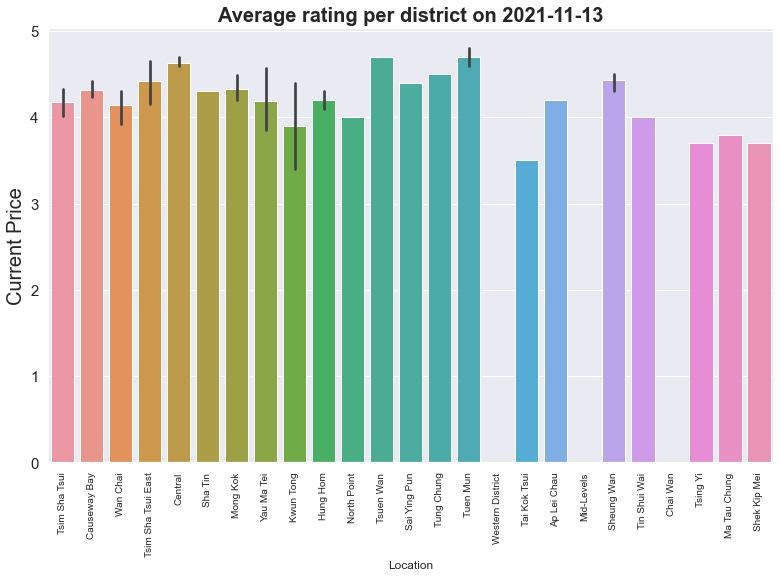

In [12]:
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.barplot(data=df_tomorrow, x='Location', y='Rating')
ax.set_ylabel("Current Price", fontsize=20)
ax.set_title("Average rating per district on 2021-11-13", fontsize = 20, fontweight='bold')
ax.tick_params(axis='x', labelsize=10, rotation=90)
ax.tick_params(axis='y', labelsize=15)
fig = ax.get_figure()
fig.savefig('figures/Average_rating_per_district_on_2021-11-13.png')

In [193]:
#getting_all_hotels_info
day_use_df.columns

hotels_df = day_use_df[['Hotel_name', 'Stars', 'Location',
       'Rating', 'Total_reviews', 'Wheelchair accessible rooms',
       'Business center', 'Bar', 'Parking close by', 'Valet Parking',
       'Rooftop bar', 'Sauna', 'Free WiFi', 'WiFi (fees apply)',
       'Outdoor pool', 'Jacuzzi', 'Free airport shuttle', 'Restaurant',
       'Concierge Service', 'Steam room', 'Parking (fees apply)',
       'Indoor pool', 'Pet friendly', 'Designated smoking area',
       'Meeting room', 'Airport shuttle (fees apply)', 'Express dry cleaning',
       'Terrace', 'Rooftop pool', 'Fitness room', 'Massage', 'Spa', 'Elevator',
       'Cleanliness', 'Check-in', 'Room Quality', 'Reception', 'Access',
       'Value_for_money', 'Amenities', 'Tranquility']]

In [194]:
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3043 entries, 0 to 3042
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Hotel_name                    3043 non-null   object 
 1   Stars                         3043 non-null   object 
 2   Location                      3043 non-null   object 
 3   Rating                        2447 non-null   float64
 4   Total_reviews                 2447 non-null   float64
 5   Wheelchair accessible rooms   3043 non-null   int64  
 6   Business center               3043 non-null   int64  
 7   Bar                           3043 non-null   int64  
 8   Parking close by              3043 non-null   int64  
 9   Valet Parking                 3043 non-null   int64  
 10  Rooftop bar                   3043 non-null   int64  
 11  Sauna                         3043 non-null   int64  
 12  Free WiFi                     3043 non-null   int64  
 13  WiF

In [195]:
#remove duplicate entries to analyze hotels dataset
hotels_df = hotels_df.drop_duplicates()

In [196]:
hotels_df

,Hotel_name,Stars,Location,Rating,Total_reviews,Wheelchair accessible rooms,Business center,Bar,Parking close by,Valet Parking,...,Spa,Elevator,Cleanliness,Check-in,Room Quality,Reception,Access,Value_for_money,Amenities,Tranquility
0,the kimberley hotel,4,Tsim Sha Tsui,4.3,19.0,1,1,0,0,0,...,0,1,4.3,4.3,4.3,4.4,4.3,4.4,4.2,4.2
31,holiday inn golden mile hong kong,4,Tsim Sha Tsui,4.4,104.0,1,1,0,0,0,...,0,1,4.8,4.9,4.8,4.8,4.8,4.6,4.8,4.6
53,the kowloon hotel,4,Tsim Sha Tsui,4.2,87.0,0,0,0,0,0,...,0,1,4.2,4.2,4.0,4.1,4.4,4.3,4.0,4.3
84,holiday inn express causeway bay,3,Causeway Bay,4.3,46.0,1,0,0,0,0,...,0,1,4.2,4.3,4.2,4.2,4.1,4.2,4.0,4.2
115,regal hongkong hotel,5,Causeway Bay,4.2,84.0,1,0,0,0,0,...,0,1,4.2,4.0,4.2,4.1,4.4,4.2,4.1,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,noble park hotel,3,Yau Ma Tei,3.3,2.0,1,0,0,0,0,...,0,1,3.0,3.0,3.5,3.5,3.0,3.5,3.5,3.5
2968,yi serviced apartments,4,Tsim Sha Tsui,NaN,NaN,1,1,0,1,0,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2991,hotel alexandra,4,North Point,NaN,NaN,1,0,1,0,0,...,0,1,3.8,3.8,3.2,3.9,3.2,3.2,3.0,3.1
3008,silvermine beach resort ltd,3,Mui Wo,NaN,NaN,1,0,1,1,0,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


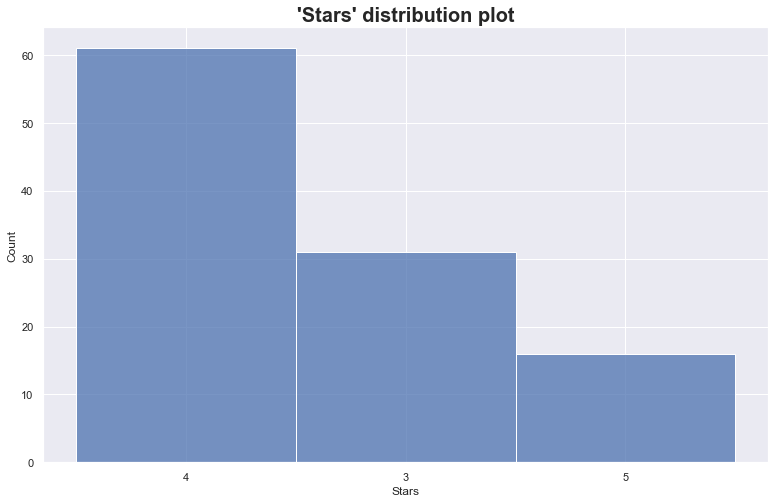

In [267]:
#check the no. of available hotels in each district
x = sns.histplot(hotels_df.Stars).set_title("'Stars' distribution plot",fontsize = 20, fontweight='bold')
fig = x.get_figure()
fig.savefig('figures/stars_distribution_plot.png')

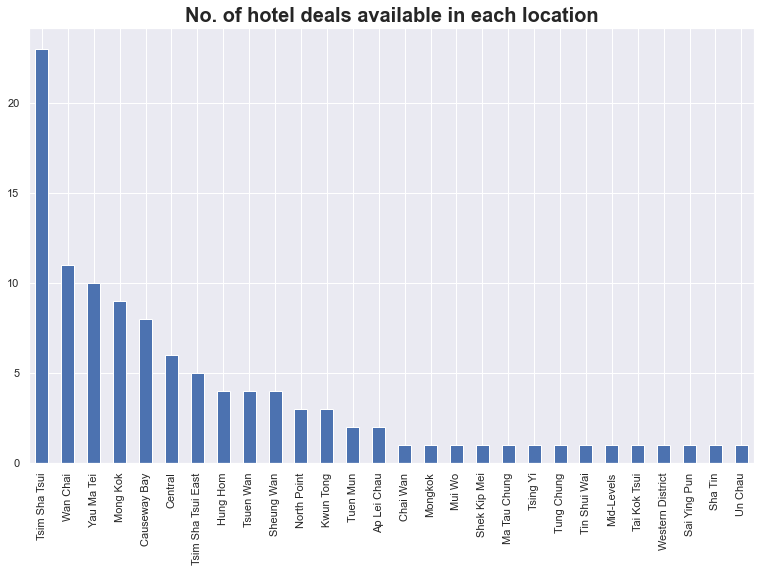

In [207]:
#number of hotel deals offered
fig, ax = plt.subplots(figsize=(13,8))
hotels_df['Location'].value_counts().plot(kind='bar')
ax.set_title("No. of hotel deals available in each location", fontsize = 20, fontweight='bold')
y = ax.get_figure()
y.savefig('figures/numbers_of_hotels_available_in_eac_location.png')


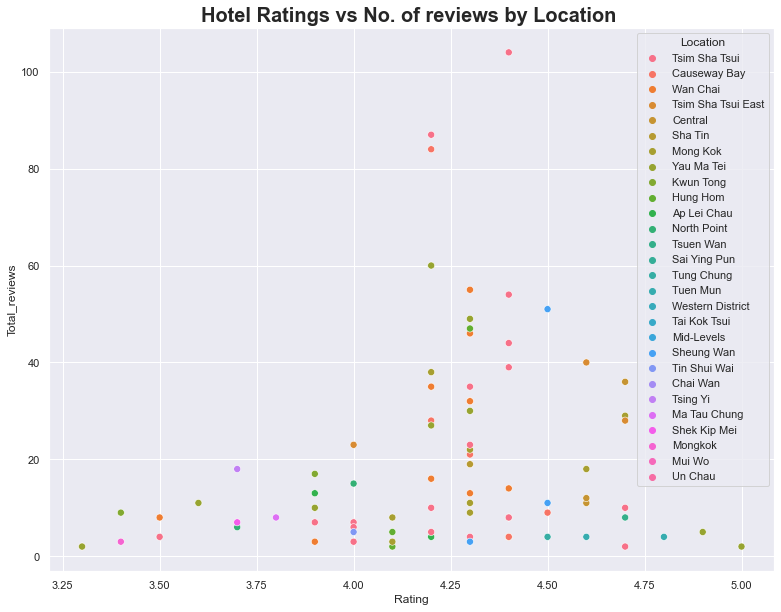

In [258]:
#compare hotel ratings with the no. of reviews in each district
fig, ax = plt.subplots(figsize=(13,10))
y = sns.scatterplot(data=hotels_df, x="Rating", y="Total_reviews", hue="Location", s=50)
y.set_title("Hotel Ratings vs No. of reviews by Location ",fontsize = 20, fontweight='bold')
#Returns the :class:~matplotlib.figure.Figure instance the artist belongs to
y = ax.get_figure()
y.savefig('figures/rating_review_location.png')

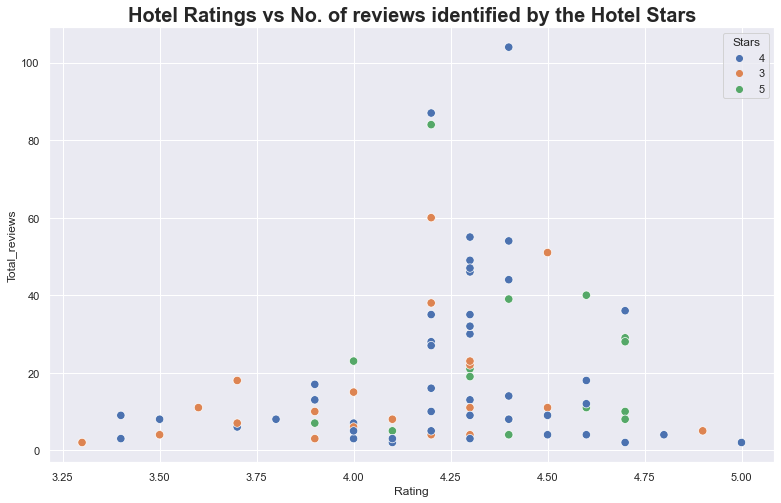

In [209]:
#compare hotel ratings with the no. of reviews in each district
fig, ax = plt.subplots(figsize=(13,8))
z = sns.scatterplot(data=hotels_df, x="Rating", y="Total_reviews", hue="Stars", s=70)
z.set_title("Hotel Ratings vs No. of reviews identified by the Hotel Stars",fontsize = 20, fontweight='bold')
z = ax.get_figure()
z.savefig('figures/rating_review_stars.png')

In [202]:
hotels_df.columns

Index(['Hotel_name', 'Stars', 'Location', 'Rating', 'Total_reviews',
       'Wheelchair accessible rooms', 'Business center', 'Bar',
       'Parking close by', 'Valet Parking', 'Rooftop bar', 'Sauna',
       'Free WiFi', 'WiFi (fees apply)', 'Outdoor pool', 'Jacuzzi',
       'Free airport shuttle', 'Restaurant', 'Concierge Service', 'Steam room',
       'Parking (fees apply)', 'Indoor pool', 'Pet friendly',
       'Designated smoking area', 'Meeting room',
       'Airport shuttle (fees apply)', 'Express dry cleaning', 'Terrace',
       'Rooftop pool', 'Fitness room', 'Massage', 'Spa', 'Elevator',
       'Cleanliness', 'Check-in', 'Room Quality', 'Reception', 'Access',
       'Value_for_money', 'Amenities', 'Tranquility'],
      dtype='object')

In [211]:
#Highest Rated Hotel

max_rating

5.0

In [229]:
#Highest Rated Hotel:
max_rating = hotels_df['Rating'].max()
print(f"The maximum rating is {int(max_rating)}")
hightest_rated_hotel = hotels_df[hotels_df['Rating']==max_rating]
print(f"The highest rated hotel is '{hightest_rated_hotel['Hotel_name'].item().title()}' in {hightest_rated_hotel['Location'].item()} with {int(hightest_rated_hotel['Total_reviews'].item())} reviews")

The maximum rating are 5
The highest rated hotel is 'Tung Nam Lou Art Hotel' in Yau Ma Tei with 2 reviews


In [228]:
#Most reviewed hotel:
max_reviews = hotels_df['Total_reviews'].max()
print(f"The maximum reviews are {int(max_reviews)}")
max_review_hotel = hotels_df[hotels_df['Total_reviews']==max_reviews]
print(f"The most reviewed hotel is '{max_review_hotel['Hotel_name'].item().title()}' in {max_review_hotel['Location'].item()} with a rating of {int(max_review_hotel['Rating'].item())}")


The maximum reviews are 104
The most reviewed hotel is 'Holiday Inn Golden Mile Hong Kong' in Tsim Sha Tsui with a rating of 4


In [255]:
sub_categories = ['Cleanliness', 'Check-in', 'Room Quality', 'Reception', 'Access',
       'Value_for_money', 'Amenities', 'Tranquility']
for category in sub_categories:
    category_max = hotels_df[category].max()
    hotel = hotels_df[hotels_df[category]==category_max]["Hotel_name"]
    hotel_location = hotels_df[hotels_df[category]==category_max]["Location"]
    print(f"The highest rated hotel in terms of '{category}' with a rating of {category_max} are:")
    for i in range(len(hotel)):
        print(f"'{hotel.values[i].title()}' in '{hotel_location.values[i]}'")
    print("\n")


The highest rated hotel in terms of 'Cleanliness' with a rating of 5.0 are:
'Hotel Purple Hong Kong' in 'Causeway Bay'
'Marco Polo Hong Kong Hotel' in 'Tsim Sha Tsui'
'Tung Nam Lou Art Hotel' in 'Yau Ma Tei'
'Stanford Hillview Hotel' in 'Tsim Sha Tsui'
'The Figo' in 'Sheung Wan'


The highest rated hotel in terms of 'Check-in' with a rating of 5.0 are:
'Marco Polo Hong Kong Hotel' in 'Tsim Sha Tsui'
'Tung Nam Lou Art Hotel' in 'Yau Ma Tei'
'Stanford Hillview Hotel' in 'Tsim Sha Tsui'


The highest rated hotel in terms of 'Room Quality' with a rating of 5.0 are:
'Tung Nam Lou Art Hotel' in 'Yau Ma Tei'
'Stanford Hillview Hotel' in 'Tsim Sha Tsui'


The highest rated hotel in terms of 'Reception' with a rating of 5.0 are:
'Tung Nam Lou Art Hotel' in 'Yau Ma Tei'
'Stanford Hillview Hotel' in 'Tsim Sha Tsui'


The highest rated hotel in terms of 'Access' with a rating of 5.0 are:
'Marco Polo Hong Kong Hotel' in 'Tsim Sha Tsui'
'Tung Nam Lou Art Hotel' in 'Yau Ma Tei'


The highest rated ho

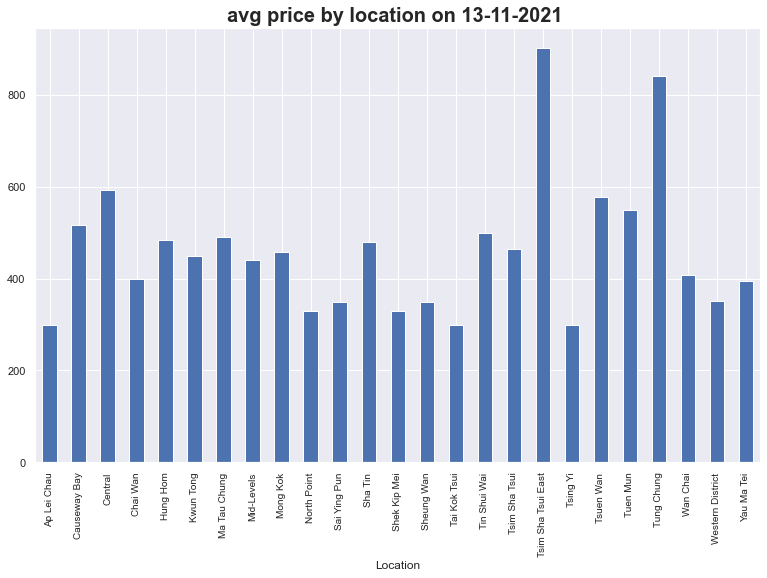

In [274]:
avg_price = df_tomorrow.groupby('Location').Current_price_HKD.mean().round()
ax = avg_price.plot.bar(rot=0)
ax.set_title("avg price by location on 13-11-2021 ", fontsize = 20, fontweight='bold')
ax.tick_params(axis='x', labelsize=10, rotation=90)
y = ax.get_figure()
y.savefig('figures/avg_price_by_location.png')

In [286]:
hotels_df.groupby('Stars').Location.value_counts()

Stars  Location          
3      Yau Ma Tei             6
       Mong Kok               5
       Tsim Sha Tsui          5
       Sheung Wan             3
       Causeway Bay           2
       Ap Lei Chau            1
       Central                1
       Chai Wan               1
       Mui Wo                 1
       North Point            1
       Sai Ying Pun           1
       Shek Kip Mei           1
       Tsing Yi               1
       Un Chau                1
       Wan Chai               1
4      Tsim Sha Tsui         15
       Wan Chai              10
       Central                4
       Yau Ma Tei             4
       Causeway Bay           3
       Hung Hom               3
       Kwun Tong              3
       Mong Kok               3
       Tsuen Wan              3
       North Point            2
       Tuen Mun               2
       Ap Lei Chau            1
       Ma Tau Chung           1
       Mid-Levels             1
       Mongkok                1
       Sheung 

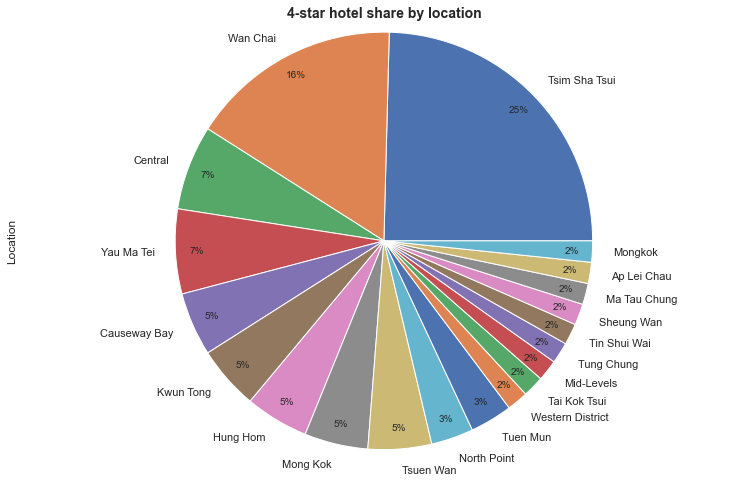

In [330]:
hotel3 = hotels_df[hotels_df['Stars']=='3']
hotel4 = hotels_df[hotels_df['Stars']=='4']
hotel5 = hotels_df[hotels_df['Stars']=='5']

plt.gca().axis("equal")
market_share_4star = hotel4["Location"].value_counts()
pie = market_share_4star.plot(kind='pie',autopct='%1.0f%%',startangle=0,pctdistance=0.9, radius=1.2)
labels = market_share_4star.index.unique()
plt.title('4-star hotel share by location', weight='bold', size=14)
plt.savefig('4_star_hotel_market_share.png')
plt.show()
plt.clf()
plt.close()

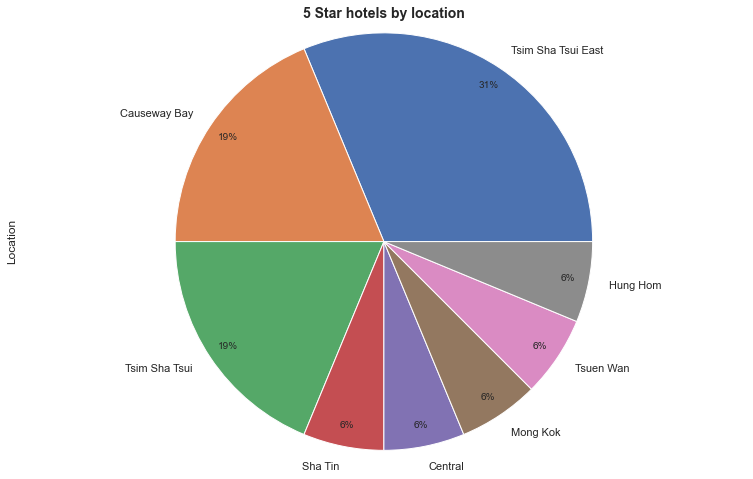

In [331]:
plt.gca().axis("equal")
market_share_5star = hotel5["Location"].value_counts()
pie = market_share_5star.plot(kind='pie',autopct='%1.0f%%',startangle=0,pctdistance=0.9, radius=1.2)
labels = market_share_5star.index.unique()
plt.title('5 Star hotels by location', weight='bold', size=14)
plt.savefig('5_star_hotel_market_share.png')
plt.show()
plt.clf()
plt.close()

In [333]:
# Which hotel has the maximum amenities?
column_list = ['Wheelchair accessible rooms', 'Business center', 'Bar',
       'Parking close by', 'Valet Parking', 'Rooftop bar', 'Sauna',
       'Free WiFi', 'WiFi (fees apply)', 'Outdoor pool', 'Jacuzzi',
       'Free airport shuttle', 'Restaurant', 'Concierge Service', 'Steam room',
       'Parking (fees apply)', 'Indoor pool', 'Pet friendly',
       'Designated smoking area', 'Meeting room',
       'Airport shuttle (fees apply)', 'Express dry cleaning', 'Terrace',
       'Rooftop pool', 'Fitness room', 'Massage', 'Spa', 'Elevator']

hotels_df["total_amenities"] = hotels_df[column_list].sum(axis=1)

In [337]:
max_amenities = hotels_df["total_amenities"].max()

In [343]:
# Which hotel has the maximum amenities?
max_amenity_hotel = hotels_df[hotels_df["total_amenities"]==max_amenities]
print(f"The hotel offereing max_amenities is {max_amenity_hotel['Hotel_name'].item().title()} in {max_amenity_hotel['Location'].item().title()}")

The hotel offereing max_amenities is King'S Hotel in Yau Ma Tei
